In [177]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statistics as stats

# Datasets

In [14]:
WineQualityDataset = pd.read_csv('../datasets/WineQT.csv')
WineQualityDataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [110]:
HousingDataset = pd.read_csv('../Datasets/HousingData.csv')
HousingDataset = HousingDataset.dropna()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
HousingDataset = pd.DataFrame(scaler.fit_transform(HousingDataset), columns=HousingDataset.columns)
print(HousingDataset.head())

       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.309129  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.165975  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.165975  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.143154  0.658555  0.441813  0.448545   
4  0.000264  0.00  0.063050   0.0  0.143154  0.549722  0.574665  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989678  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994243  0.033389  0.631111  
4  0.086957  0.066794  0.648936  0.992950  0.096026  0.526667  


In [111]:
X = HousingDataset.drop('MEDV', axis=1)
y = HousingDataset['MEDV']


Housing_X_train, Housing_X_test, Housing_y_train, Housing_y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Housing_X_train, Housing_X_val, Housing_y_train, Housing_y_val = train_test_split(Housing_X_train, Housing_y_train, test_size=0.25, random_state=42)

In [74]:
Wine_X = WineQualityDataset.drop('quality', axis=1)
Wine_y = WineQualityDataset['quality']

Wine_X_train, Wine_X_test, Wine_y_train, Wine_y_test = train_test_split(Wine_X, Wine_y, test_size=0.1, random_state=42)
Wine_X_train, Wine_X_val, Wine_y_train, Wine_y_val = train_test_split(Wine_X_train, Wine_y_train, test_size=0.1, random_state=52)

Wine_X_train = Wine_X_train.to_numpy()
Wine_y_train = Wine_y_train.to_numpy()
Wine_y_train -= 3 # To make the range of values from 0 to 5

Wine_X_val = Wine_X_val.to_numpy()
Wine_y_val = Wine_y_val.to_numpy()
Wine_y_val -= 3 # To make the range of values from 0 to 5

Wine_X_test = Wine_X_test.to_numpy()
Wine_y_test = Wine_y_test.to_numpy()
Wine_y_test -= 3 # To make the range of values from 0 to 5

scaler = StandardScaler()
Wine_X_train = scaler.fit_transform(Wine_X_train)
Wine_X_val = scaler.fit_transform(Wine_X_val)
Wine_X_test = scaler.fit_transform(Wine_X_test)


print("For Wine Dataset:")
print(f"Size of training set = {len(Wine_X_train)}\nSize of validation set = {len(Wine_X_val)}\nSize of test set = {len(Wine_X_test)}")

For Wine Dataset:
Size of training set = 925
Size of validation set = 103
Size of test set = 115


In [59]:
class DecisionTree:
    def __init__(self, criterion='gini', max_depth=None, random_state=None, classes=None, task_type='classification'):
        if task_type == 'classification':
            self.tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=random_state)
        elif task_type == 'regression':
            self.tree = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth, random_state=random_state)
        self.classes = classes

    def fit(self, X, y, sample_weight=None):
        self.tree.fit(X, y, sample_weight=sample_weight)
        return self

    def predict(self, X):
        return self.tree.predict(X)

    def predict_proba(self, X):
        proba = self.tree.predict_proba(X)
        if self.classes is not None and proba.shape[1] != len(self.classes):
            # Adjust the probability array to include missing classes
            full_proba = np.zeros((proba.shape[0], len(self.classes)))
            indices = np.array([np.where(self.classes == c)[0][0] for c in self.tree.classes_])
            full_proba[:, indices] = proba
            return full_proba
        return proba

    def evaluate(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)


In [60]:
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, max_features='auto'):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        if self.max_features == 'auto':
            self.max_features = n_features
        elif isinstance(self.max_features, float):
            self.max_features = int(self.max_features * n_features)

        for _ in range(self.n_estimators):
            idxs = np.random.choice(range(n_samples), size=n_samples, replace=True)
            sample_X, sample_y = X[idxs], y[idxs]

            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_preds)
        return predictions

In [115]:
class RandomForestRegressor:
    def __init__(self, num_features, num_estimators, fraction, bootstrap=True, voting_mech='hard'):
        self.num_features = num_features
        self.num_estimators = num_estimators
        self.fraction = fraction
        self.bootstrap = bootstrap
        self.voting_mech = voting_mech
        self.models = []

    def fit(self, X_train, y_train):
        X_train_bag = []
        y_train_bag = []

        # Formulating the train datasets
        for _ in range(self.num_estimators):
            sampled_X = X_train.sample(frac=self.fraction, replace=self.bootstrap)
            X_train_bag.append(sampled_X)
            y_train_bag.append(y_train[sampled_X.index])

        # Training the models
        for i in range(self.num_estimators):
            model = DecisionTreeRegressor(max_features=self.num_features)
            model.fit(X_train_bag[i], y_train_bag[i])
            self.models.append(model)

    def predict(self, X_test, X_val=None, y_val=None):
        if self.voting_mech == 'hard':
            y_pred = np.mean([model.predict(X_test) for model in self.models], axis=0)
            return y_pred

        elif self.voting_mech == 'soft':
            if X_val is None or y_val is None:
                raise ValueError("Validation data must be provided for soft voting.")
            
            confidences = []
            for model in self.models:
                y_pred = model.predict(X_val)
                mse = mean_squared_error(y_val, y_pred)
                confidences.append(1 / mse)
            
            confidences = np.array(confidences)
            index = np.argmax(confidences)
            return self.models[index].predict(X_test)

In [122]:
random_forest_regressor_model = RandomForestRegressor(5, 100, 1)
random_forest_regressor_model.fit(Housing_X_train, Housing_y_train)
y_pred = random_forest_regressor_model.predict(Housing_X_test, Housing_y_test)
print(mean_squared_error(Housing_y_test.to_numpy(), y_pred))

0.016692855027348033


## Finding best hyperparmeters for the random forest model

In [146]:
n_estimators_options = [10, 50, 100, 200]
max_depth_options = [5, 10, 20]

best_accuracy = 0
best_params = {}
accuracy_random_forest_classifier = []
training_times_random_forest = []

for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        model = RandomForest(n_estimators=n_estimators, max_depth=max_depth)
        start_time = time.time()
        model.fit(Wine_X_train, Wine_y_train)
        training_times_random_forest.append(time.time() - start_time)
        preds = model.predict(Wine_X_test)
        accuracy = accuracy_score(Wine_y_test, preds)
        accuracy_random_forest_classifier.append(accuracy)
        print(f"Accuracy for n_estimators = {n_estimators} and max_depth = {max_depth} is {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

print()
print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_accuracy}")

Accuracy for n_estimators = 10 and max_depth = 5 is 0.6434782608695652
Accuracy for n_estimators = 10 and max_depth = 10 is 0.591304347826087
Accuracy for n_estimators = 10 and max_depth = 20 is 0.591304347826087
Accuracy for n_estimators = 50 and max_depth = 5 is 0.6173913043478261
Accuracy for n_estimators = 50 and max_depth = 10 is 0.6086956521739131
Accuracy for n_estimators = 50 and max_depth = 20 is 0.6173913043478261
Accuracy for n_estimators = 100 and max_depth = 5 is 0.6260869565217392
Accuracy for n_estimators = 100 and max_depth = 10 is 0.6086956521739131
Accuracy for n_estimators = 100 and max_depth = 20 is 0.6260869565217392
Accuracy for n_estimators = 200 and max_depth = 5 is 0.6
Accuracy for n_estimators = 200 and max_depth = 10 is 0.6
Accuracy for n_estimators = 200 and max_depth = 20 is 0.6347826086956522

Best parameters: {'n_estimators': 10, 'max_depth': 5}
Best accuracy: 0.6434782608695652


## Decision Trees + Ada Boost

In [131]:
class AdaBoostClassifier:    
        def __init__(self, num_estimators):
            self.num_estimators = num_estimators
            self.models = []
            self.alphas = []
            self.weights = []
            self.errors = []

        def helper(self, y, y_pred):
            list_val = [-1]*len(y)
            y = np.array(y)
            y_pred = np.array(y_pred)
            for i in range(len(y)):
                if y[i] == y_pred[i]:
                    list_val[i] = 1
            return np.array(list_val)

        # fitting the model for the data
        def fit(self, X, y):
            self.weights = np.ones(len(X)) / len(X)
            for i in range(self.num_estimators):
                model = DecisionTreeClassifier()
                model.fit(X, y, sample_weight=self.weights)
                self.models.append(model)
                y_pred = model.predict(X)
                error = np.sum(self.weights * (y_pred != y))
                self.errors.append(error)
                if error > 1e-7:
                    alpha = 0.5 * np.log((1 - error) / error)
                else:
                    alpha = 0.5 * np.log((1 - 1e-7) / 1e-7)
                self.alphas.append(alpha)
                self.weights *= np.exp(-alpha * (self.helper(y, y_pred)))
                self.weights /= np.sum(self.weights)
    
        def predict(self, X):
            y_pred = []
            for i in range(self.num_estimators):
                y_pred.append(self.models[i].predict(X))
            y_pred = np.array(y_pred)
            y_pred = np.round(np.mean(y_pred, axis=0))
            return y_pred

In [132]:
adaboost_model = AdaBoostClassifier(num_estimators=100)
adaboost_model.fit(Wine_X_train, Wine_y_train)
y_pred = adaboost_model.predict(Wine_X_test)
print(accuracy_score(Wine_y_test, y_pred))

0.6173913043478261


In [160]:
num_estimators = [10, 25, 50, 75, 100, 150, 175, 200]
accuracies_ada = []
training_times_ada = []

for i in range(len(num_estimators)):
    ada = AdaBoostClassifier(num_estimators[i])
    start = time.time()
    ada.fit(Wine_X_train, Wine_y_train)
    end = time.time()
    y_pred = ada.predict(Wine_X_test)
    accuracies_ada.append(accuracy_score(Wine_y_test, y_pred))
    training_times_ada.append(end - start)
    print(f"Estimators: {num_estimators[i]} | Accuracy: {accuracies_ada[i]} | Training time: | {training_time_ac[i]}")

Estimators: 10 | Accuracy: 0.6086956521739131 | Training time: | 0.09052205085754395
Estimators: 25 | Accuracy: 0.6086956521739131 | Training time: | 0.164384126663208
Estimators: 50 | Accuracy: 0.6173913043478261 | Training time: | 0.3275878429412842
Estimators: 75 | Accuracy: 0.6173913043478261 | Training time: | 0.5227148532867432
Estimators: 100 | Accuracy: 0.6086956521739131 | Training time: | 0.6539602279663086
Estimators: 150 | Accuracy: 0.6173913043478261 | Training time: | 1.0304346084594727
Estimators: 175 | Accuracy: 0.6 | Training time: | 1.2460658550262451
Estimators: 200 | Accuracy: 0.6086956521739131 | Training time: | 1.3560841083526611


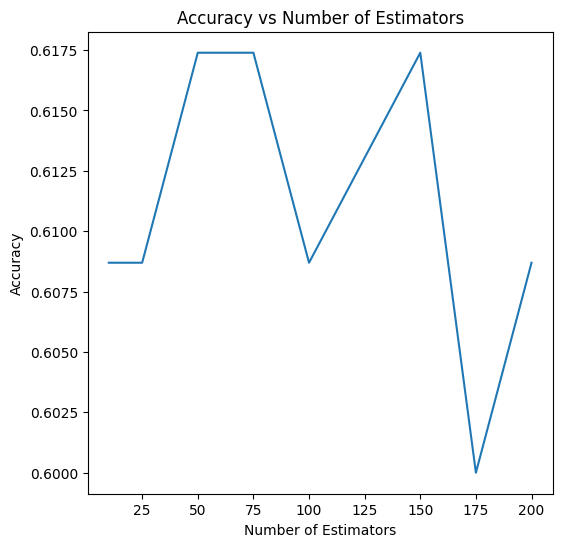

In [161]:
plt.figure(figsize=(6, 6))
plt.plot(num_estimators, accuracies_ada)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

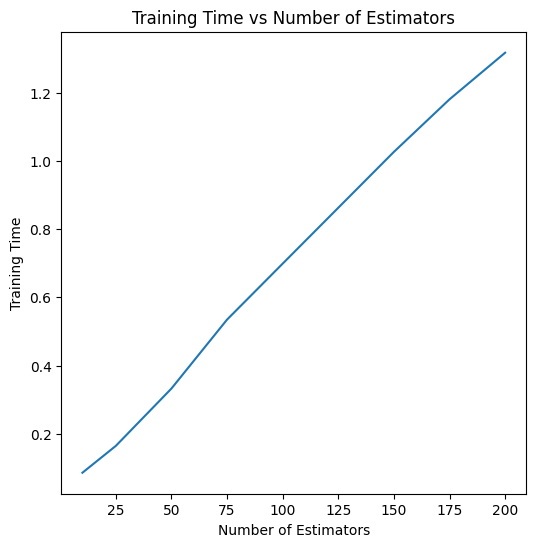

In [162]:
plt.figure(figsize=(6, 6))
plt.plot(num_estimators, training_times_ada)
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time')
plt.title('Training Time vs Number of Estimators')
plt.show()

### Comparing ada boost and random forest classifier

In [163]:
max_acc_ada = max(accuracies_ada)
max_acc_random_forest = max(accuracy_random_forest_classifier)
max_training_ada = max(training_times_ada)
max_training_random_forest = max(training_times_random_forest)

print(f"Max accuracy for AdaBoostClassifier: {max_acc_ada}")
print(f"Max accuracy for RandomForestClassifier: {max_acc_random_forest}")
print(f"Max training time for AdaBoostClassifier: {max_training_ada}")
print(f"Max training time for RandomForestClassifier: {max_training_random_forest}")

Max accuracy for AdaBoostClassifier: 0.6173913043478261
Max accuracy for RandomForestClassifier: 0.6434782608695652
Max training time for AdaBoostClassifier: 1.3168458938598633
Max training time for RandomForestClassifier: 0.9962527751922607


In [164]:
class AdaBoostRegressor:
    def __init__(self, num_estimators):
        self.num_estimators = num_estimators
        self.models = []
        self.alphas = []
        self.weights = []
        self.errors = []

    def small_func(self, y, y_pred):
        y = np.array(y)
        y_pred = np.array(y_pred)
        a = np.square(np.subtract(y, y_pred))
        b = np.ones(len(y))
        mse = mean_squared_error(y, y_pred)
        indexes = np.where(a < mse)
        b[indexes] = -1
        return b
    
    def fit(self, X, y):
        self.weights = np.ones(len(X)) / len(X)
        for i in range(self.num_estimators):
            model = DecisionTreeRegressor()
            model.fit(X, y, sample_weight=self.weights)
            self.models.append(model)
            y_pred = model.predict(X)
            error = np.sum(self.weights * (y_pred != y))
            self.errors.append(error)
            if error > 1e-7:
                alpha = 0.5 * np.log((1 - error) / error)
            else:
                alpha = 0.5 * np.log((1 - 1e-7) / 1e-7)
            self.alphas.append(alpha)
            self.weights *= np.exp(-alpha * (self.small_func(y, y_pred)))
            self.weights /= np.sum(self.weights)
    
    def predict(self, X):
        y_pred = []
        for i in range(self.num_estimators):
            y_pred.append(self.models[i].predict(X))
        y_pred = np.array(y_pred)
        y_pred = np.mean(y_pred, axis=0)
        return y_pred

In [166]:
num_estimators = [10, 25, 50, 100,150, 200]
mse_scores_ada_regressor = []
training_time_ada_regressor = []

for i in range(len(num_estimators)):
    ada = AdaBoostRegressor(num_estimators[i])
    start = time.time()
    ada.fit(Housing_X_train, Housing_y_train)
    end = time.time()
    y_pred = ada.predict(Housing_X_test)
    mse_scores_ada_regressor.append(mean_squared_error(Housing_y_test, y_pred))
    training_time_ada_regressor.append(end - start)
    print('MSE for num_estimators = ', num_estimators[i], ' is ', mse_scores_ada_regressor[i], ' and training time is ', training_time_ada_regressor[i])

MSE for num_estimators =  10  is  0.01512594967963744  and training time is  0.052223920822143555
MSE for num_estimators =  25  is  0.012177648558051916  and training time is  0.10386991500854492
MSE for num_estimators =  50  is  0.012816764319404862  and training time is  0.14933991432189941
MSE for num_estimators =  100  is  0.016881030110954865  and training time is  0.29425525665283203
MSE for num_estimators =  150  is  0.016682354059488487  and training time is  0.4201819896697998
MSE for num_estimators =  200  is  0.012880100895432482  and training time is  0.566338062286377


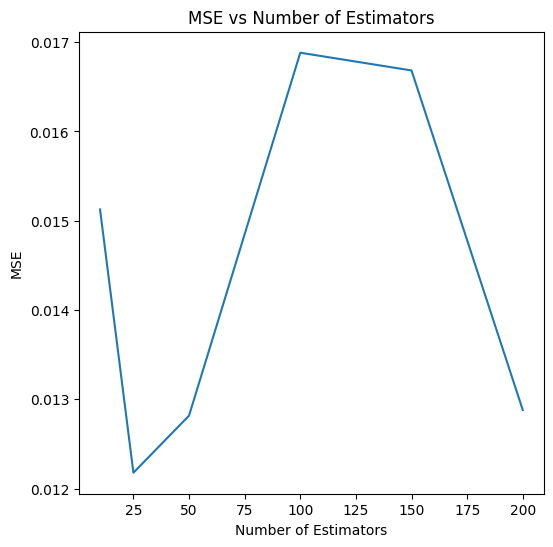

In [167]:
plt.figure(figsize=(6, 6))
plt.plot(num_estimators, mse_scores_ada_regressor)
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.title('MSE vs Number of Estimators')
plt.show()

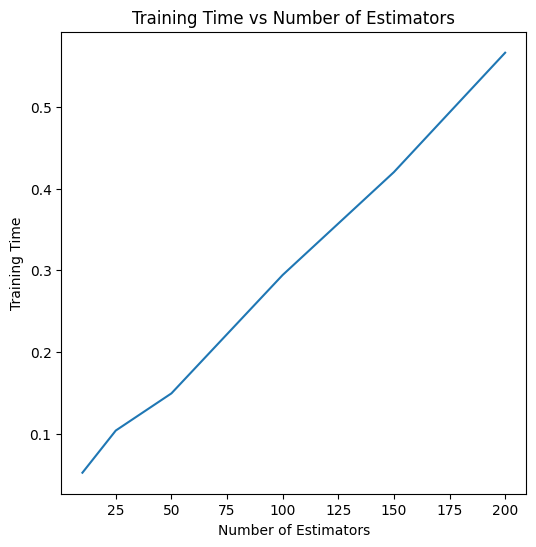

In [168]:
plt.figure(figsize=(6, 6))
plt.plot(num_estimators, training_time_ada_regressor)
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time')
plt.title('Training Time vs Number of Estimators')
plt.show()

In [169]:
max_mse_ada_regressor = max(mse_scores_ada_regressor)
max_training_ada_regressor = max(training_time_ada_regressor)

print(f"Max MSE for AdaBoostRegressor: {max_mse_ada_regressor}")
print(f"Max training time for AdaBoostRegressor: {max_training_ada_regressor}")

# print max times also
max_time_ada_regressor = max(training_time_ada_regressor)
max_time_random_forest_classifier = max(training_times_random_forest)

print(f"Max training time for AdaBoostRegressor: {max_time_ada_regressor}")
print(f"Max training time for RandomForestClassifier: {max_time_random_forest_classifier}")

Max MSE for AdaBoostRegressor: 0.016881030110954865
Max training time for AdaBoostRegressor: 0.566338062286377
Max training time for AdaBoostRegressor: 0.566338062286377
Max training time for RandomForestClassifier: 0.9962527751922607


### Gradient Boosting

Gradient Boosting Classifier Accuracy: 0.0
Estimators: 10, Learning Rate: 0.01, Accuracy: 0.00, Time: 0.06s
Estimators: 10, Learning Rate: 0.1, Accuracy: 0.00, Time: 0.06s
Estimators: 10, Learning Rate: 1, Accuracy: 0.62, Time: 0.01s
Estimators: 25, Learning Rate: 0.01, Accuracy: 0.00, Time: 0.16s
Estimators: 25, Learning Rate: 0.1, Accuracy: 0.00, Time: 0.13s
Estimators: 25, Learning Rate: 1, Accuracy: 0.63, Time: 0.02s
Estimators: 50, Learning Rate: 0.01, Accuracy: 0.00, Time: 0.33s
Estimators: 50, Learning Rate: 0.1, Accuracy: 0.00, Time: 0.13s
Estimators: 50, Learning Rate: 1, Accuracy: 0.59, Time: 0.03s
Estimators: 100, Learning Rate: 0.01, Accuracy: 0.00, Time: 0.65s
Estimators: 100, Learning Rate: 0.1, Accuracy: 0.00, Time: 0.14s
Estimators: 100, Learning Rate: 1, Accuracy: 0.60, Time: 0.05s
Estimators: 150, Learning Rate: 0.01, Accuracy: 0.00, Time: 0.94s
Estimators: 150, Learning Rate: 0.1, Accuracy: 0.00, Time: 0.17s
Estimators: 150, Learning Rate: 1, Accuracy: 0.59, Time: 0.

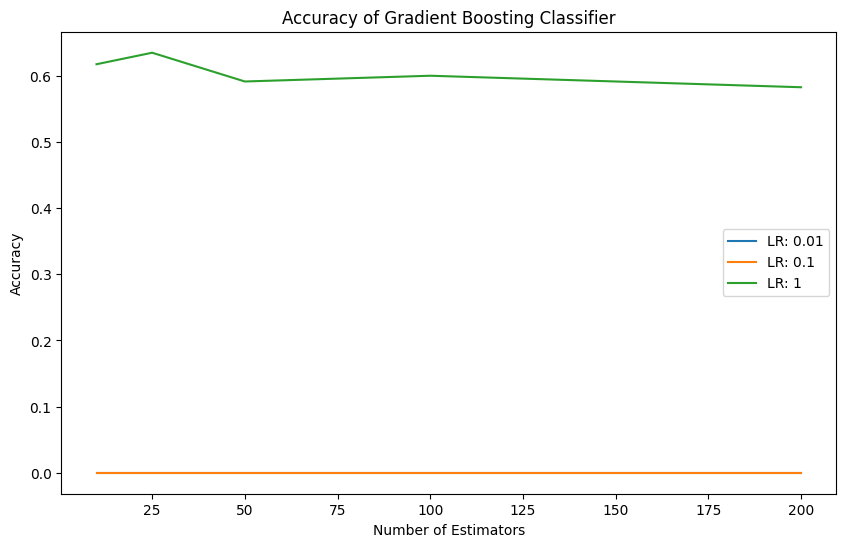

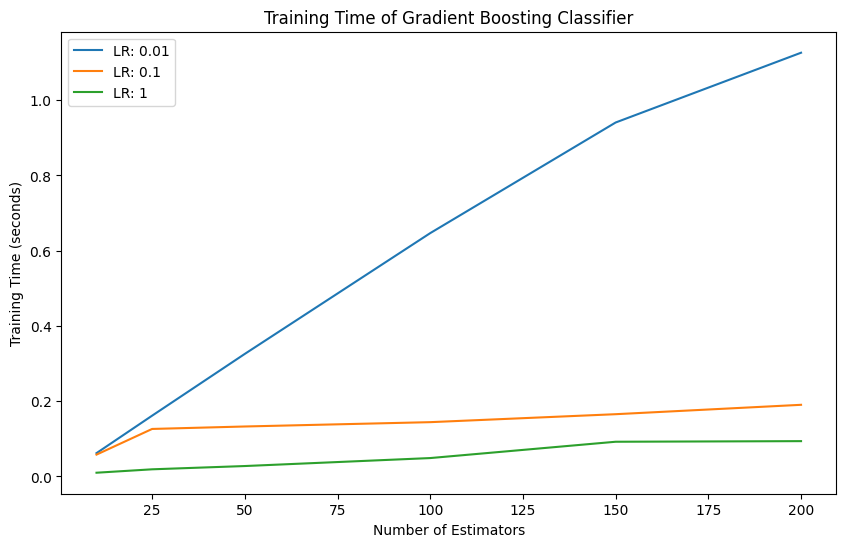

Gradient Boosting Classifier - Best Estimators: 25, Best Learning Rate: 1, Best Accuracy: 0.63, Time: 0.02s


In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class GradientBoostingClassifierCustom:
    def __init__(self, n_estimators, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        cumulative_prediction = np.zeros(len(X))
        for _ in range(self.n_estimators):
            residual_error = np.round(y - cumulative_prediction)
            tree = DecisionTreeClassifier()
            tree.fit(X, residual_error)
            update_prediction = self.learning_rate * tree.predict(X)
            cumulative_prediction += update_prediction
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        final_prediction = np.round(np.sum(tree_predictions, axis=0))
        return final_prediction

# Test the custom Gradient Boosting Classifier
gradient_boost = GradientBoostingClassifierCustom(100)
gradient_boost.fit(Wine_X_train, Wine_y_train)
y_pred = gradient_boost.predict(Wine_X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(Wine_y_test, y_pred))

# Hyperparameter tuning
n_estimators_options = [10, 25, 50, 100, 150, 200]
learning_rate_options = [0.01, 0.1, 1]
accuracy_scores = np.zeros((len(n_estimators_options), len(learning_rate_options)))
training_times = np.zeros((len(n_estimators_options), len(learning_rate_options)))

for i, n_estimators in enumerate(n_estimators_options):
    for j, learning_rate in enumerate(learning_rate_options):
        start_time = time.time()
        gbc = GradientBoostingClassifierCustom(n_estimators, learning_rate)
        gbc.fit(Wine_X_train, Wine_y_train)
        y_pred = gbc.predict(Wine_X_test)
        end_time = time.time()

        accuracy_scores[i][j] = accuracy_score(Wine_y_test, y_pred)
        training_times[i][j] = end_time - start_time
        print(f"Estimators: {n_estimators}, Learning Rate: {learning_rate}, Accuracy: {accuracy_scores[i][j]:.2f}, Time: {training_times[i][j]:.2f}s")

# Plot accuracy and training time
plt.figure(figsize=(10, 6))
for j, learning_rate in enumerate(learning_rate_options):
    plt.plot(n_estimators_options, accuracy_scores[:, j], label=f'LR: {learning_rate}')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy of Gradient Boosting Classifier')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for j, learning_rate in enumerate(learning_rate_options):
    plt.plot(n_estimators_options, training_times[:, j], label=f'LR: {learning_rate}')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Gradient Boosting Classifier')
plt.legend()
plt.show()

# Identify the best performance
best_index = np.unravel_index(np.argmax(accuracy_scores), accuracy_scores.shape)
best_n_estimators = n_estimators_options[best_index[0]]
best_learning_rate = learning_rate_options[best_index[1]]
best_accuracy = accuracy_scores[best_index]
best_time = training_times[best_index]

print(f"Gradient Boosting Classifier - Best Estimators: {best_n_estimators}, Best Learning Rate: {best_learning_rate}, Best Accuracy: {best_accuracy:.2f}, Time: {best_time:.2f}s")

Mean Squared Error: 2.5849074896238586
Estimators: 10, Learning Rate: 0.01, MSE: 2.29, Time: 0.03s
Estimators: 10, Learning Rate: 0.1, MSE: 1.03, Time: 0.03s
Estimators: 10, Learning Rate: 1, MSE: 0.16, Time: 0.01s
Estimators: 25, Learning Rate: 0.01, MSE: 13.86, Time: 0.07s
Estimators: 25, Learning Rate: 0.1, MSE: 2.19, Time: 0.07s
Estimators: 25, Learning Rate: 1, MSE: 0.17, Time: 0.04s
Estimators: 50, Learning Rate: 0.01, MSE: 45.35, Time: 0.14s
Estimators: 50, Learning Rate: 0.1, MSE: 2.53, Time: 0.15s
Estimators: 50, Learning Rate: 1, MSE: 0.17, Time: 0.08s
Estimators: 100, Learning Rate: 0.01, MSE: 120.47, Time: 0.29s
Estimators: 100, Learning Rate: 0.1, MSE: 2.57, Time: 0.28s
Estimators: 100, Learning Rate: 1, MSE: 0.17, Time: 0.14s
Estimators: 150, Learning Rate: 0.01, MSE: 182.82, Time: 0.41s
Estimators: 150, Learning Rate: 0.1, MSE: 2.55, Time: 0.40s
Estimators: 150, Learning Rate: 1, MSE: 0.17, Time: 0.20s
Estimators: 200, Learning Rate: 0.01, MSE: 227.73, Time: 0.54s
Estima

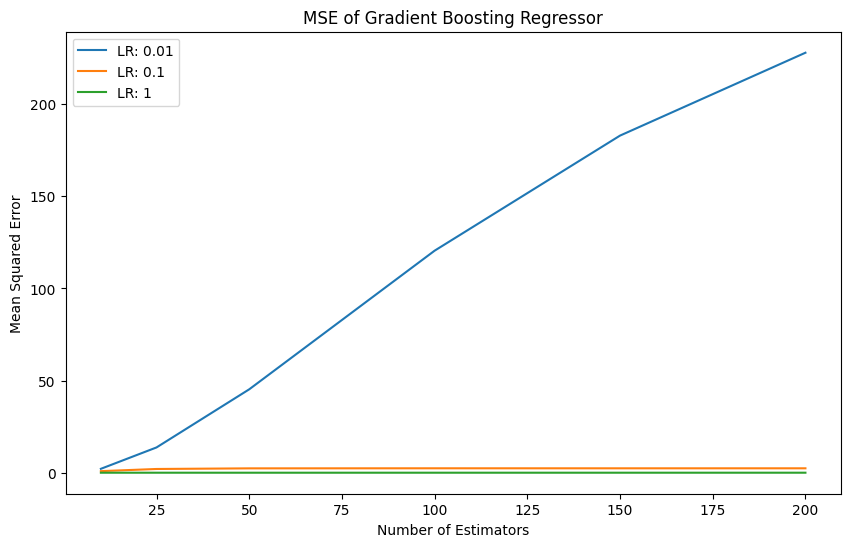

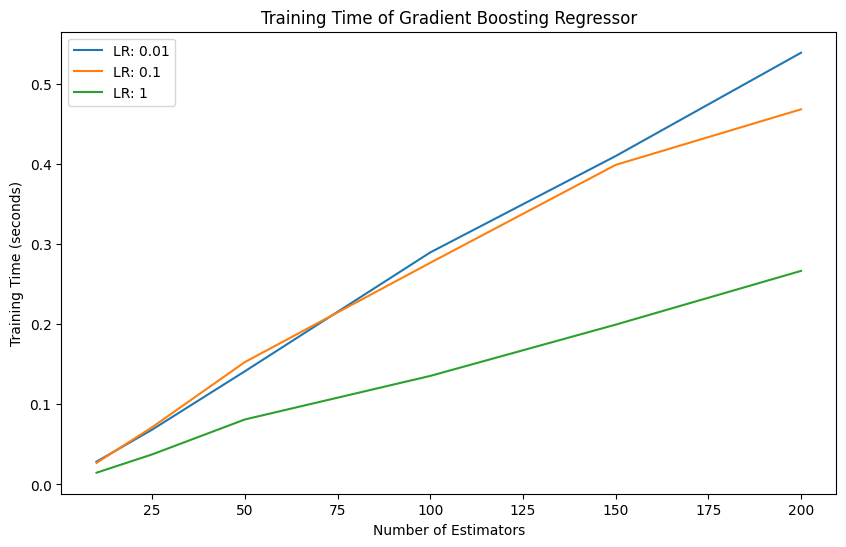

Gradient Boosting Regressor - Best Estimators: 10, Best Learning Rate: 1, Best MSE: 0.16, Time: 0.01s


In [180]:
class GradientBoostingRegressorCustom:
    def __init__(self, n_estimators, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        initial_prediction = np.mean(y)
        cumulative_prediction = np.full(len(X), initial_prediction)
        for _ in range(self.n_estimators):
            residuals = y - cumulative_prediction
            tree = DecisionTreeRegressor()
            tree.fit(X, residuals)
            update = self.learning_rate * tree.predict(X)
            cumulative_prediction += update
            self.trees.append(tree)

    def predict(self, X):
        cumulative_predictions = np.array([tree.predict(X) for tree in self.trees])
        final_prediction = np.sum(cumulative_predictions, axis=0)
        return final_prediction

# Test the custom Gradient Boosting Regressor
gradient_boost_reg = GradientBoostingRegressorCustom(100)
gradient_boost_reg.fit(Housing_X_train, Housing_y_train)
y_pred = gradient_boost_reg.predict(Housing_X_test)
print("Mean Squared Error:", mean_squared_error(Housing_y_test, y_pred))

# Hyperparameter tuning
n_estimators_options = [10, 25, 50, 100, 150, 200]
learning_rate_options = [0.01, 0.1, 1]
mse_scores = np.zeros((len(n_estimators_options), len(learning_rate_options)))
training_times = np.zeros((len(n_estimators_options), len(learning_rate_options)))

for i, n_estimators in enumerate(n_estimators_options):
    for j, learning_rate in enumerate(learning_rate_options):
        start_time = time.time()
        gbc = GradientBoostingRegressorCustom(n_estimators, learning_rate)
        gbc.fit(Housing_X_train, Housing_y_train)
        y_pred = gbc.predict(Housing_X_test)
        end_time = time.time()

        mse_scores[i][j] = mean_squared_error(Housing_y_test, y_pred)
        training_times[i][j] = end_time - start_time
        print(f"Estimators: {n_estimators}, Learning Rate: {learning_rate}, MSE: {mse_scores[i][j]:.2f}, Time: {training_times[i][j]:.2f}s")

# Plot MSE and training time
plt.figure(figsize=(10, 6))
for j, learning_rate in enumerate(learning_rate_options):
    plt.plot(n_estimators_options, mse_scores[:, j], label=f'LR: {learning_rate}')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('MSE of Gradient Boosting Regressor')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for j, learning_rate in enumerate(learning_rate_options):
    plt.plot(n_estimators_options, training_times[:, j], label=f'LR: {learning_rate}')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time of Gradient Boosting Regressor')
plt.legend()
plt.show()

# Identify the best performance
best_index = np.unravel_index(np.argmin(mse_scores), mse_scores.shape)
best_n_estimators = n_estimators_options[best_index[0]]
best_learning_rate = learning_rate_options[best_index[1]]
best_mse = mse_scores[best_index]
best_time = training_times[best_index]

print(f"Gradient Boosting Regressor - Best Estimators: {best_n_estimators}, Best Learning Rate: {best_learning_rate}, Best MSE: {best_mse:.2f}, Time: {best_time:.2f}s")
